**Problem statement**

There has been feedback about delays in Grab transport services in both Jakarta and Singapore (late driver arrival → late arrival at destination). This has led to a decrease in customer satisfaction and trust, which might increase customer turnover. Upon further research, it was found that this could be due to inaccurate ETA prediction, bad route planning, or other factors. Using the above dataset of GPS pings, what insights can your team obtain to help Grab alleviate these issues? 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import datetime

In [3]:
! unzip "/content/drive/MyDrive/Colab Notebooks/Grab-Posisi dataset/grab-posis-city=Singapore.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/Grab-Posisi dataset/grab-posis-city=Singapore.zip
replace city=Singapore/part-00003-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [4]:
df = pd.read_parquet("/content/city=Singapore", engine = 'pyarrow')
df

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy
0,70014,car,android,1554943236,1.342326,103.888969,18.910000,248,3.9
1,73573,car,android,1555582623,1.321781,103.856366,17.719076,44,4.0
2,75567,car,android,1555141026,1.327088,103.861273,14.021548,34,3.9
3,1410,car,android,1555731693,1.262482,103.823794,13.026521,181,4.0
4,4354,car,android,1555584497,1.283799,103.807210,14.812943,93,3.9
...,...,...,...,...,...,...,...,...,...
30329680,72196,car,android,1554771148,1.326351,103.890147,5.880000,313,3.9
30329681,58589,car,ios,1555842124,1.322549,103.970248,25.285847,32,12.0
30329682,80684,car,android,1554720657,1.300553,103.907405,20.533981,255,6.0
30329683,498,car,ios,1554990704,1.347160,103.966904,25.770779,145,12.0


In [5]:
df.isnull().sum()

trj_id           0
driving_mode     0
osname           0
pingtimestamp    0
rawlat           0
rawlng           0
speed            0
bearing          0
accuracy         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30329685 entries, 0 to 30329684
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   trj_id         object 
 1   driving_mode   object 
 2   osname         object 
 3   pingtimestamp  int64  
 4   rawlat         float64
 5   rawlng         float64
 6   speed          float64
 7   bearing        int64  
 8   accuracy       float64
dtypes: float64(4), int64(2), object(3)
memory usage: 2.0+ GB


In [7]:
# functions to change dtypes
df['trj_id'] = df['trj_id'].astype('category')
df['driving_mode'] = df['driving_mode'].astype('category')
df['osname'] = df['osname'].astype('category')
df['pingtimestamp'] = df['pingtimestamp'].astype('int32')
df['rawlat'] = df['rawlat'].astype('float32')
df['rawlng'] = df['rawlng'].astype('float32')
df['speed'] = df['speed'].astype('float32')
df['bearing'] = df['bearing'].astype('int32')
df['accuracy'] = df['accuracy'].astype('float32')

def format_datetime(df, col_name):
    # get datetime obj for all timestamps
    dt = df[col_name].apply(datetime.datetime.fromtimestamp)
    
    df["time"] = dt.apply(lambda x: x.time())
    df["day_of_week"] = dt.apply(lambda x: x.weekday())
    df["month"] = dt.apply(lambda x: x.month)
    df["year"] = dt.apply(lambda x: x.year)

In [8]:
format_datetime(df, "pingtimestamp")


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30329685 entries, 0 to 30329684
Data columns (total 13 columns):
 #   Column         Dtype   
---  ------         -----   
 0   trj_id         category
 1   driving_mode   category
 2   osname         category
 3   pingtimestamp  int32   
 4   rawlat         float32 
 5   rawlng         float32 
 6   speed          float32 
 7   bearing        int32   
 8   accuracy       float32 
 9   time           object  
 10  day_of_week    int64   
 11  month          int64   
 12  year           int64   
dtypes: category(3), float32(4), int32(2), int64(3), object(1)
memory usage: 1.7+ GB


In [10]:
df['time'] = df['time'].astype('category')
df['day_of_week'] = df['day_of_week'].astype('int32')
df['month'] = df['month'].astype('int32')
df['year'] = df['year'].astype('int32')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30329685 entries, 0 to 30329684
Data columns (total 13 columns):
 #   Column         Dtype   
---  ------         -----   
 0   trj_id         category
 1   driving_mode   category
 2   osname         category
 3   pingtimestamp  int32   
 4   rawlat         float32 
 5   rawlng         float32 
 6   speed          float32 
 7   bearing        int32   
 8   accuracy       float32 
 9   time           category
 10  day_of_week    int32   
 11  month          int32   
 12  year           int32   
dtypes: category(4), float32(4), int32(5)
memory usage: 1.2 GB


In [12]:
df.describe(include = "all")

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy,time,day_of_week,month,year
count,30329685,30329685,30329685,3.032968e+07,3.032968e+07,3.032968e+07,3.032968e+07,3.032968e+07,3.032968e+07,30329685,3.032968e+07,30329685.0,30329685.0
unique,28000,1,2,NaN,NaN,NaN,NaN,NaN,NaN,86030,NaN,NaN,NaN
top,78371,car,android,NaN,NaN,NaN,NaN,NaN,NaN,10:21:15,NaN,NaN,NaN
freq,6798,30329685,16114701,NaN,NaN,NaN,NaN,NaN,NaN,786,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.555321e+09,1.106323e+00,7.080468e+01,1.723095e+01,1.788420e+02,6.423700e+00,NaN,3.134983e+00,4.0,2019.0
std,NaN,NaN,NaN,3.580121e+05,2.323540e-01,3.365821e+01,6.906806e+00,1.017391e+02,3.871886e+01,NaN,1.969039e+00,0.0,0.0
min,NaN,NaN,NaN,1.554682e+09,1.241585e+00,1.036143e+02,-1.000000e+00,0.000000e+00,1.000000e+00,NaN,0.000000e+00,4.0,2019.0
25%,NaN,NaN,NaN,1.554999e+09,1.322314e+00,1.037903e+02,1.168946e+01,9.300000e+01,4.000000e+00,NaN,1.000000e+00,4.0,2019.0
50%,NaN,NaN,NaN,1.555343e+09,1.339908e+00,1.038394e+02,1.789483e+01,1.720000e+02,6.000000e+00,NaN,3.000000e+00,4.0,2019.0
75%,NaN,NaN,NaN,1.555645e+09,1.377545e+00,1.038748e+02,2.186000e+01,2.690000e+02,1.000000e+01,NaN,5.000000e+00,4.0,2019.0


In [13]:
import folium
from folium import plugins
from branca.element import Figure

# latitude and longitude of Singapore
sg_lat = 1.290270
sg_lng = 103.851959

In [14]:
# create figure
fig = Figure(width = 550, height = 350)

# add map to figure
m = folium.Map(width = 550, height = 350,
               location = [sg_lat, sg_lng],
               zoom_start = 11, min_zoom = 11, max_zoom = 16)
fig.add_child(m)



In [15]:
# create figure
fig = Figure(width = 550, height = 350)

# add map to figure
m = folium.Map(width = 550, height = 350,
               location = [sg_lat, sg_lng],
               zoom_start = 11, min_zoom = 11, max_zoom = 16,
               tiles = "Stamen Toner")
# can use "Stamen Terrain", "Stamen Toner", "Mapbox Bright", "Mapbox Control Room"
fig.add_child(m)

m

In [16]:
example = df.iloc[0,]

# create figure
fig2 = Figure(width = 550, height = 350)

# add map to figure
m2 = folium.Map(location = [sg_lat, sg_lng],
                tiles = 'cartodbpositron',
                zoom_start = 11)
fig2.add_child(m2)

# add marker to the map
folium.Marker(location = [example["rawlat"], example["rawlng"]],
              popup = 'Default popup Marker1',
              tooltip = 'example').add_to(m2)
m2

experiment using Lat and Long Popups for Data Visualisation as well as the accuracy(circle of radius)

In [17]:
df_sample = df.sample(100)
df.head()

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy,time,day_of_week,month,year
0,70014,car,android,1554943236,1.342326,103.888969,18.910000,248,3.9,00:40:36,3,4,2019
1,73573,car,android,1555582623,1.321781,103.856369,17.719076,44,4.0,10:17:03,3,4,2019
2,75567,car,android,1555141026,1.327088,103.861275,14.021548,34,3.9,07:37:06,5,4,2019
3,1410,car,android,1555731693,1.262482,103.823792,13.026521,181,4.0,03:41:33,5,4,2019
4,4354,car,android,1555584497,1.283799,103.807213,14.812943,93,3.9,10:48:17,3,4,2019


In [18]:
fig5 = Figure(width = 550, height = 350)

m5 = folium.Map(location = [sg_lat, sg_lng], zoom_start = 11)
m5.add_child(folium.LatLngPopup())

fig5.add_child(m5)
m5

In [19]:
fig5 = Figure(width = 550, height = 350)

m5 = folium.Map(width = 550, height = 350,
               location = [sg_lat, sg_lng],
               zoom_start = 11, min_zoom = 11, max_zoom = 16,
               )
for i in range(0,len(df_sample)):
    lat = df_sample.iloc[i].rawlat.astype('float64')
    lon = df_sample.iloc[i].rawlng.astype('float64')
    acc = df_sample.iloc[i].accuracy.astype('float64')
    folium.Circle(radius = acc,location = [lat,lon],color = "#3186cc",fill = True,fill_color = "#3186cc").add_to(m5)

fig5.add_child(m5)

m5




Exploratory Data Analysis

In [20]:
# filtering by the unique rides
df_copy = df.copy()
df_copy = df_copy.sort_values("pingtimestamp",ascending = True)
df_unique = df_copy.drop_duplicates(subset=['trj_id'])
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 10892081 to 28659309
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   trj_id         28000 non-null  category
 1   driving_mode   28000 non-null  category
 2   osname         28000 non-null  category
 3   pingtimestamp  28000 non-null  int32   
 4   rawlat         28000 non-null  float32 
 5   rawlng         28000 non-null  float32 
 6   speed          28000 non-null  float32 
 7   bearing        28000 non-null  int32   
 8   accuracy       28000 non-null  float32 
 9   time           28000 non-null  category
 10  day_of_week    28000 non-null  int32   
 11  month          28000 non-null  int32   
 12  year           28000 non-null  int32   
dtypes: category(4), float32(4), int32(5)
memory usage: 5.3 MB


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

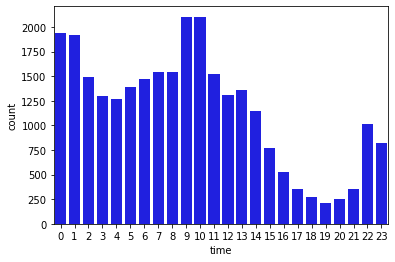

In [22]:
hours = df_unique['time'].apply(lambda x: x.hour)
sns.countplot(x = hours, color = 'blue')
# we can infer that the busiest time is 9-10 am as it is the morning peak hours and also surprisingly low during the afternoon peak hours

In [23]:
df_unique['trj_id'].describe()

count     28000
unique    28000
top          10
freq          1
Name: trj_id, dtype: object

In [24]:
df_unique['driving_mode'].value_counts
# all grab rides are by car in Singapore, hence extremely likely that they cannot get out of traffic jams easily

<bound method IndexOpsMixin.value_counts of 10892081    car
16753940    car
9508982     car
7119121     car
19719789    car
           ... 
15320926    car
16384615    car
12591439    car
27735827    car
28659309    car
Name: driving_mode, Length: 28000, dtype: category
Categories (1, object): ['car']>

In [25]:
df_unique.head()

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy,time,day_of_week,month,year
10892081,70895,car,android,1554682166,1.380114,103.769821,9.954684,111,4.0,00:09:26,0,4,2019
16753940,21926,car,android,1554682188,1.291268,103.862595,11.018375,75,4.0,00:09:48,0,4,2019
9508982,47498,car,ios,1554682190,1.375195,103.736290,18.564516,307,8.0,00:09:50,0,4,2019
7119121,18103,car,android,1554682195,1.450080,103.821526,0.404055,159,3.0,00:09:55,0,4,2019
19719789,41322,car,android,1554682197,1.280679,103.830643,17.940001,232,3.9,00:09:57,0,4,2019


In [26]:
# sort by pingtimestamp to get end-time, get the 30m data first
df_copy_two = df.copy()
df_copy_two = df_copy_two.sort_values(['trj_id','pingtimestamp'],ascending = False)
df_new = df_copy_two.drop_duplicates(subset=['trj_id'])
df_new

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy,time,day_of_week,month,year
13817830,9984,car,ios,1555725862,1.247867,103.837936,6.429016,89,8.000,02:04:22,5,4,2019
16088134,9982,car,ios,1554828066,1.425922,103.787338,20.385883,283,8.000,16:41:06,1,4,2019
1025285,998,car,ios,1555627861,1.296571,103.852600,10.860184,221,12.000,22:51:01,3,4,2019
21182453,9970,car,android,1555581297,1.316325,103.873421,15.296123,178,4.000,09:54:57,3,4,2019
16270405,997,car,ios,1555055811,1.371148,103.947006,0.121461,15,5.000,07:56:51,4,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692745,10004,car,ios,1554780407,1.392301,103.908844,24.792555,137,8.000,03:26:47,1,4,2019
239996,10001,car,android,1555503425,1.328267,103.750641,15.385287,303,3.900,12:17:05,2,4,2019
11295744,1000,car,ios,1554944629,1.368858,103.861008,8.445251,180,8.000,01:03:49,3,4,2019
25109667,100,car,ios,1555383648,1.335207,103.842209,5.622902,208,13.000,03:00:48,1,4,2019


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30329685 entries, 0 to 30329684
Data columns (total 13 columns):
 #   Column         Dtype   
---  ------         -----   
 0   trj_id         category
 1   driving_mode   category
 2   osname         category
 3   pingtimestamp  int32   
 4   rawlat         float32 
 5   rawlng         float32 
 6   speed          float32 
 7   bearing        int32   
 8   accuracy       float32 
 9   time           category
 10  day_of_week    int32   
 11  month          int32   
 12  year           int32   
dtypes: category(4), float32(4), int32(5)
memory usage: 1.2 GB


In [28]:
df_merged = df_unique.merge(df_new,how='inner',on = 'trj_id')
df_merged 

,trj_id,driving_mode_x,osname_x,pingtimestamp_x,rawlat_x,rawlng_x,speed_x,bearing_x,accuracy_x,time_x,day_of_week_x,month_x,year_x,driving_mode_y,osname_y,pingtimestamp_y,rawlat_y,rawlng_y,speed_y,bearing_y,accuracy_y,time_y,day_of_week_y,month_y,year_y
0,70895,car,android,1554682166,1.380114,103.769821,9.954684,111,4.000,00:09:26,0,4,2019,car,android,1554683411,1.327961,103.776680,3.038841,218,3.000,00:30:11,0,4,2019
1,21926,car,android,1554682188,1.291268,103.862595,11.018375,75,4.000,00:09:48,0,4,2019,car,android,1554683324,1.353319,103.987206,12.613331,24,4.000,00:28:44,0,4,2019
2,47498,car,ios,1554682190,1.375195,103.736290,18.564516,307,8.000,00:09:50,0,4,2019,car,ios,1554683192,1.329217,103.679474,0.926466,181,7.000,00:26:32,0,4,2019
3,18103,car,android,1554682195,1.450080,103.821526,0.404055,159,3.000,00:09:55,0,4,2019,car,android,1554683504,1.376343,103.850487,0.000000,95,3.613,00:31:44,0,4,2019
4,41322,car,android,1554682197,1.280679,103.830643,17.940001,232,3.900,00:09:57,0,4,2019,car,android,1554683649,1.325481,103.660751,21.020000,313,3.900,00:34:09,0,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,44505,car,ios,1555889457,1.327429,103.813896,18.571745,5,16.000,23:30:57,6,4,2019,car,ios,1555890868,1.350519,103.985588,10.874559,23,32.000,23:54:28,6,4,2019
27996,5652,car,android,1555889490,1.369383,103.860016,0.000000,0,3.000,23:31:30,6,4,2019,car,android,1555890824,1.301263,103.843109,24.180000,132,5.360,23:53:44,6,4,2019
27997,32449,car,android,1555889584,1.340956,103.885307,6.910000,62,10.720,23:33:04,6,4,2019,car,android,1555890780,1.333403,103.961632,10.140000,110,4.288,23:53:00,6,4,2019
27998,17190,car,android,1555889593,1.391471,103.838158,2.484318,300,6.719,23:33:13,6,4,2019,car,android,1555890996,1.337227,103.778900,12.413955,202,4.000,23:56:36,6,4,2019


In [29]:
# calculate to find the distance between two coordinates and then find the time needed to get between points
# take the actual time used to get between points and observe difference to find whether there is delay

import geopy.distance
required_time = []
for i in range(0,len(df_merged)):
  coord_1 = (df_merged.iloc[i].rawlat_x,df_merged.iloc[i].rawlng_x)
  coord_2 = (df_merged.iloc[i].rawlat_y,df_merged.iloc[i].rawlng_y)
  distance = geopy.distance.vincenty(coord_1, coord_2).km
  speed = df_merged.iloc[i].speed_x * 3600/1000 # convert speed to km/h for standardisation
  req_time = distance/speed # in hrs
  required_time.append(req_time)
df_merged['Required Time'] = required_time
df_merged.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


,trj_id,driving_mode_x,osname_x,pingtimestamp_x,rawlat_x,rawlng_x,speed_x,bearing_x,accuracy_x,time_x,day_of_week_x,month_x,year_x,driving_mode_y,osname_y,pingtimestamp_y,rawlat_y,rawlng_y,speed_y,bearing_y,accuracy_y,time_y,day_of_week_y,month_y,year_y,Required Time
0,70895,car,android,1554682166,1.380114,103.769821,9.954684,111,4.0,00:09:26,0,4,2019,car,android,1554683411,1.327961,103.776680,3.038841,218,3.000,00:30:11,0,4,2019,0.162322
1,21926,car,android,1554682188,1.291268,103.862595,11.018375,75,4.0,00:09:48,0,4,2019,car,android,1554683324,1.353319,103.987206,12.613331,24,4.000,00:28:44,0,4,2019,0.390068
2,47498,car,ios,1554682190,1.375195,103.736290,18.564516,307,8.0,00:09:50,0,4,2019,car,ios,1554683192,1.329217,103.679474,0.926466,181,7.000,00:26:32,0,4,2019,0.121399
3,18103,car,android,1554682195,1.450080,103.821526,0.404055,159,3.0,00:09:55,0,4,2019,car,android,1554683504,1.376343,103.850487,0.000000,95,3.613,00:31:44,0,4,2019,6.027312
4,41322,car,android,1554682197,1.280679,103.830643,17.940001,232,3.9,00:09:57,0,4,2019,car,android,1554683649,1.325481,103.660751,21.020000,313,3.900,00:34:09,0,4,2019,0.302638


In [30]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 0 to 27999
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   trj_id           28000 non-null  category
 1   driving_mode_x   28000 non-null  category
 2   osname_x         28000 non-null  category
 3   pingtimestamp_x  28000 non-null  int32   
 4   rawlat_x         28000 non-null  float32 
 5   rawlng_x         28000 non-null  float32 
 6   speed_x          28000 non-null  float32 
 7   bearing_x        28000 non-null  int32   
 8   accuracy_x       28000 non-null  float32 
 9   time_x           28000 non-null  category
 10  day_of_week_x    28000 non-null  int32   
 11  month_x          28000 non-null  int32   
 12  year_x           28000 non-null  int32   
 13  driving_mode_y   28000 non-null  category
 14  osname_y         28000 non-null  category
 15  pingtimestamp_y  28000 non-null  int32   
 16  rawlat_y         28000 non-null  float32

In [31]:
date = datetime.date(1, 1, 1)
datetime1 = datetime.datetime.combine(date, df_merged.iloc[0].time_y)
datetime2 = datetime.datetime.combine(date, df_merged.iloc[0].time_x )
time_elapsed = datetime1 - datetime2
time_elapsed.total_seconds()

1245.0

In [32]:
# find the actual time used between two points - pick-up and drop-off 
# Assumption is that both pick-up and drop-off pingtimestamp corresponds near to the one in the dataset

actual_time = []
for i in range(0,len(df_merged)):
  time_1 = df_merged.iloc[i].time_y
  time_2 = df_merged.iloc[i].time_x
  date = datetime.date(1,1,1)
  datetime1 = datetime.datetime.combine(date, time_1)
  datetime2 = datetime.datetime.combine(date, time_2)
  time_elapsed = datetime1 - datetime2
  time_hr = time_elapsed.total_seconds()/3600
  actual_time.append(time_hr)
df_merged['Time Used'] = actual_time
df_merged.head()

,trj_id,driving_mode_x,osname_x,pingtimestamp_x,rawlat_x,rawlng_x,speed_x,bearing_x,accuracy_x,time_x,day_of_week_x,month_x,year_x,driving_mode_y,osname_y,pingtimestamp_y,rawlat_y,rawlng_y,speed_y,bearing_y,accuracy_y,time_y,day_of_week_y,month_y,year_y,Required Time,Time Used
0,70895,car,android,1554682166,1.380114,103.769821,9.954684,111,4.0,00:09:26,0,4,2019,car,android,1554683411,1.327961,103.776680,3.038841,218,3.000,00:30:11,0,4,2019,0.162322,0.345833
1,21926,car,android,1554682188,1.291268,103.862595,11.018375,75,4.0,00:09:48,0,4,2019,car,android,1554683324,1.353319,103.987206,12.613331,24,4.000,00:28:44,0,4,2019,0.390068,0.315556
2,47498,car,ios,1554682190,1.375195,103.736290,18.564516,307,8.0,00:09:50,0,4,2019,car,ios,1554683192,1.329217,103.679474,0.926466,181,7.000,00:26:32,0,4,2019,0.121399,0.278333
3,18103,car,android,1554682195,1.450080,103.821526,0.404055,159,3.0,00:09:55,0,4,2019,car,android,1554683504,1.376343,103.850487,0.000000,95,3.613,00:31:44,0,4,2019,6.027312,0.363611
4,41322,car,android,1554682197,1.280679,103.830643,17.940001,232,3.9,00:09:57,0,4,2019,car,android,1554683649,1.325481,103.660751,21.020000,313,3.900,00:34:09,0,4,2019,0.302638,0.403333


In [33]:
df_delay = df_merged[df_merged['Time Used'] > df_merged['Required Time']]
df_delay

,trj_id,driving_mode_x,osname_x,pingtimestamp_x,rawlat_x,rawlng_x,speed_x,bearing_x,accuracy_x,time_x,day_of_week_x,month_x,year_x,driving_mode_y,osname_y,pingtimestamp_y,rawlat_y,rawlng_y,speed_y,bearing_y,accuracy_y,time_y,day_of_week_y,month_y,year_y,Required Time,Time Used
0,70895,car,android,1554682166,1.380114,103.769821,9.954684,111,4.0,00:09:26,0,4,2019,car,android,1554683411,1.327961,103.776680,3.038841,218,3.0,00:30:11,0,4,2019,0.162322,0.345833
2,47498,car,ios,1554682190,1.375195,103.736290,18.564516,307,8.0,00:09:50,0,4,2019,car,ios,1554683192,1.329217,103.679474,0.926466,181,7.0,00:26:32,0,4,2019,0.121399,0.278333
4,41322,car,android,1554682197,1.280679,103.830643,17.940001,232,3.9,00:09:57,0,4,2019,car,android,1554683649,1.325481,103.660751,21.020000,313,3.9,00:34:09,0,4,2019,0.302638,0.403333
5,64813,car,ios,1554682203,1.309046,103.864929,17.070000,106,10.0,00:10:03,0,4,2019,car,ios,1554683210,1.421030,103.824898,19.469999,36,10.0,00:26:50,0,4,2019,0.214145,0.279722
7,66542,car,android,1554682277,1.358179,103.955536,9.105961,179,4.0,00:11:17,0,4,2019,car,android,1554683760,1.327530,103.861946,19.580423,206,12.0,00:36:00,0,4,2019,0.334122,0.411944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27986,70731,car,android,1555889335,1.346440,103.758698,15.750000,61,13.0,23:28:55,6,4,2019,car,android,1555890654,1.299850,103.785500,6.500000,61,10.0,23:50:54,6,4,2019,0.104990,0.366389
27988,32044,car,android,1555889373,1.435167,103.790421,12.740000,268,3.9,23:29:33,6,4,2019,car,android,1555890862,1.339096,103.747696,0.000000,0,3.0,23:54:22,6,4,2019,0.253762,0.413611
27991,45718,car,android,1555889377,1.431965,103.768883,14.510000,169,3.9,23:29:37,6,4,2019,car,android,1555890864,1.363285,103.832581,13.920000,59,4.0,23:54:24,6,4,2019,0.198879,0.413056
27992,5452,car,ios,1555889377,1.416183,103.839775,8.143250,202,12.0,23:29:37,6,4,2019,car,ios,1555890869,1.328965,103.889778,9.883471,347,8.0,23:54:29,6,4,2019,0.379811,0.414444


In [34]:
time_diff = []
for i in range(0,len(df_delay)):
  delay = df_delay.iloc[i,26] - df_delay.iloc[i,25]
  time_diff.append(delay)
df_delay['Delay Severity'] = time_diff
df_delay = df_delay[df_delay['speed_x'] >= 0]
df_delay = df_delay[df_delay['speed_y'] >= 0]
df_delay.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,trj_id,driving_mode_x,osname_x,pingtimestamp_x,rawlat_x,rawlng_x,speed_x,bearing_x,accuracy_x,time_x,day_of_week_x,month_x,year_x,driving_mode_y,osname_y,pingtimestamp_y,rawlat_y,rawlng_y,speed_y,bearing_y,accuracy_y,time_y,day_of_week_y,month_y,year_y,Required Time,Time Used,Delay Severity
0,70895,car,android,1554682166,1.380114,103.769821,9.954684,111,4.0,00:09:26,0,4,2019,car,android,1554683411,1.327961,103.776680,3.038841,218,3.0,00:30:11,0,4,2019,0.162322,0.345833,0.183511
2,47498,car,ios,1554682190,1.375195,103.736290,18.564516,307,8.0,00:09:50,0,4,2019,car,ios,1554683192,1.329217,103.679474,0.926466,181,7.0,00:26:32,0,4,2019,0.121399,0.278333,0.156934
4,41322,car,android,1554682197,1.280679,103.830643,17.940001,232,3.9,00:09:57,0,4,2019,car,android,1554683649,1.325481,103.660751,21.020000,313,3.9,00:34:09,0,4,2019,0.302638,0.403333,0.100695
5,64813,car,ios,1554682203,1.309046,103.864929,17.070000,106,10.0,00:10:03,0,4,2019,car,ios,1554683210,1.421030,103.824898,19.469999,36,10.0,00:26:50,0,4,2019,0.214145,0.279722,0.065577
7,66542,car,android,1554682277,1.358179,103.955536,9.105961,179,4.0,00:11:17,0,4,2019,car,android,1554683760,1.327530,103.861946,19.580423,206,12.0,00:36:00,0,4,2019,0.334122,0.411944,0.077822


In [35]:
# to find out how bad is the delay
df_delay['Delay Severity'].describe()

count    11217.000000
mean         0.107977
std          0.097313
min          0.000004
25%          0.047501
50%          0.089691
75%          0.144540
max          4.452563
Name: Delay Severity, dtype: float64

[(0.0, 0.5)]

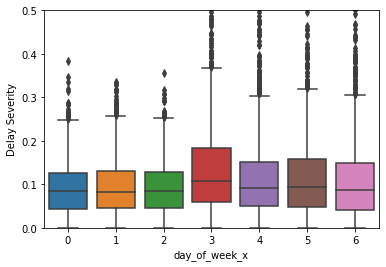

In [50]:
# boxplot to find out the disbribution of delay time across the day
ax = sns.boxplot(x = "day_of_week_x", y = "Delay Severity", data = df_delay) 
ax.set(ylim=(0,0.5))

# we can conclude that the mean delay time for each of the day is around the time, however, day 3, day 5 and day 6 seems to suggest
# a higher 75% pecentile than the rest, which we will continue to investigate below.

In [47]:
# boxplot to find out the distribution of delay time across the top 5 trajectory with highest amt of delay
df_plot = df_delay.sort_values('Delay Severity').head(5)
sns.boxplot(x = "trj_id", y = "Delay Severity", data = df_plot)

Error in callback <function flush_figures at 0x7fdcf9dea320> (for post_execute):


KeyboardInterrupt: ignored

In [38]:
# overview of the skewness
df_delay.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


pingtimestamp_x   -0.000647
rawlat_x           0.447692
rawlng_x           0.149874
speed_x            0.260244
bearing_x         -0.064142
accuracy_x         4.223152
day_of_week_x      0.022328
month_x            0.000000
year_x             0.000000
pingtimestamp_y    0.000078
rawlat_y           0.445713
rawlng_y           0.121601
speed_y            0.112778
bearing_y          0.068442
accuracy_y         3.963479
day_of_week_y      0.022328
month_y            0.000000
year_y             0.000000
Required Time      1.042240
Time Used          7.161719
Delay Severity     9.864143
dtype: float64

In [39]:
# overview of unique rides that have a significant amount of delay/narrow our route id of interest
df_severe = df_delay[df_delay['Delay Severity'] > 1]
df_severe

,trj_id,driving_mode_x,osname_x,pingtimestamp_x,rawlat_x,rawlng_x,speed_x,bearing_x,accuracy_x,time_x,day_of_week_x,month_x,year_x,driving_mode_y,osname_y,pingtimestamp_y,rawlat_y,rawlng_y,speed_y,bearing_y,accuracy_y,time_y,day_of_week_y,month_y,year_y,Required Time,Time Used,Delay Severity
20354,72549,car,android,1555576202,1.345423,103.871056,17.250000,28,3.9,08:30:02,3,4,2019,car,android,1555581114,1.340151,103.870903,14.350000,189,3.9,09:51:54,3,4,2019,0.009390,1.364444,1.355054
26886,78371,car,android,1555838486,1.345677,103.732071,6.504030,147,3.9,09:21:26,6,4,2019,car,android,1555854891,1.358473,103.749977,0.000000,120,3.0,13:54:51,6,4,2019,0.104381,4.556944,4.452563
27546,77844,car,android,1555867007,1.331362,103.934212,11.238976,348,3.9,17:16:47,6,4,2019,car,android,1555873966,1.365149,103.841682,0.018702,210,6.6,19:12:46,6,4,2019,0.270741,1.933056,1.662314


In [40]:
df_severe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 20354 to 27546
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   trj_id           3 non-null      category
 1   driving_mode_x   3 non-null      category
 2   osname_x         3 non-null      category
 3   pingtimestamp_x  3 non-null      int32   
 4   rawlat_x         3 non-null      float32 
 5   rawlng_x         3 non-null      float32 
 6   speed_x          3 non-null      float32 
 7   bearing_x        3 non-null      int32   
 8   accuracy_x       3 non-null      float32 
 9   time_x           3 non-null      category
 10  day_of_week_x    3 non-null      int32   
 11  month_x          3 non-null      int32   
 12  year_x           3 non-null      int32   
 13  driving_mode_y   3 non-null      category
 14  osname_y         3 non-null      category
 15  pingtimestamp_y  3 non-null      int32   
 16  rawlat_y         3 non-null      float32

**Insight 1**: We can deduce that there is a minor delay which may result from a minor traffic jam due to the peak hours on certain roads/expressways in Singapore. A possible solution will be to lower price of bookings as compensation for the minor delay or have discounts on future bookings as compensation for the delays(upon accumulation of certain "delay points") or explore alternative smaller/arterial routes which is unlikely to have traffic jam. Rationale is that we can see from the stats that the delay can be negligible for some people while ard 5-10 mins for most, hence it is fairer to compensate the people who are affected more from the delay 

**Data Visualization** for routes having significant delay

In [41]:
df_2 = pd.read_parquet("/content/city=Singapore", engine = 'pyarrow')
df_2['trj_id'] = df_2['trj_id'].astype('str')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30329685 entries, 0 to 30329684
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   trj_id         object 
 1   driving_mode   object 
 2   osname         object 
 3   pingtimestamp  int64  
 4   rawlat         float64
 5   rawlng         float64
 6   speed          float64
 7   bearing        int64  
 8   accuracy       float64
dtypes: float64(4), int64(2), object(3)
memory usage: 2.0+ GB


In [42]:
df_filtered = df_2[(df_2['trj_id'] == '72549')|(df_2['trj_id'] == '78371')|(df_2['trj_id'] == '77844')]
df_filtered

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy
121576,72549,car,android,1555579760,1.438197,103.808718,10.61,222,3.900
121694,72549,car,android,1555578725,1.453432,103.805610,0.00,0,3.000
121761,72549,car,android,1555578361,1.454481,103.810563,0.48,255,3.000
121855,72549,car,android,1555577819,1.428091,103.799856,15.73,43,3.900
121914,72549,car,android,1555580283,1.394585,103.818098,17.64,106,3.900
...,...,...,...,...,...,...,...,...,...
29738011,72549,car,android,1555579754,1.438585,103.809054,7.68,227,3.900
29738032,72549,car,android,1555580984,1.343822,103.862752,5.17,76,3.900
29738058,72549,car,android,1555579380,1.452997,103.805421,2.04,222,3.309
29738108,72549,car,android,1555578054,1.441524,103.811058,12.63,23,3.900


In [43]:
# function to get the lat and lng in an array given df and id
def get_route(df, trj_id):
    return df_filtered.query('trj_id == ' + f"'{trj_id}'").sort_values("pingtimestamp")[["rawlat", "rawlng"]]

In [44]:
route_1 = get_route(df_filtered, '72549')
route_2 = get_route(df_filtered, '78371')
route_3 = get_route(df_filtered, '77844')

In [45]:
# function to get start and ending position of trajectory
def get_start_end_pos(trj):
  return (trj.iloc[0, :], trj.iloc[-1, :])

In [53]:
# create new figure
fig_trj = Figure(height = 550, width = 750)

# add map to figure
m_trj = folium.Map(location = [sg_lat, sg_lng],
                tiles = 'cartodbpositron', zoom_start = 11,
                min_zoom = 11, max_zoom = 16)
fig_trj.add_child(m_trj)

# Creating feature groups
f1 = folium.FeatureGroup("Slowest")
f2 = folium.FeatureGroup("2nd Slowest")
f3 = folium.FeatureGroup("3rd Slowest")

# Adding lines to the different feature groups
line_1 = folium.vector_layers.PolyLine(route_1.values,
                                       popup = '<b>Path of Vehicle_1</b>',
                                       tooltip = 'Slowest',
                                       color = 'blue', weight = 1).add_to(f1)                                  
line_2 = folium.vector_layers.PolyLine(route_2.values,
                                       popup = '<b>Path of Vehicle_2</b>',
                                       tooltip = '2nd Slowest',
                                       color = 'red', weight = 1).add_to(f2)
line_3 = folium.vector_layers.PolyLine(route_3.values,
                                       popup = '<b>Path of Vehicle_3</b>',
                                       tooltip = '3rd Slowest',
                                       color = 'green', weight = 1).add_to(f3)

# add ploylines to map
f1.add_to(m_trj)
f2.add_to(m_trj)
f3.add_to(m_trj)

# get start and end points of each trajectory
route_1_positions = get_start_end_pos(route_1)
route_2_positions = get_start_end_pos(route_2)
route_3_positions = get_start_end_pos(route_3)

# add markers for trj 1
folium.Marker(
    location = [route_1_positions[0][0], route_1_positions[0][1]],
    popup = "start point",
    icon = folium.Icon(color = "green"),
).add_to(f1)

folium.Marker(
    location = [route_1_positions[1][0], route_1_positions[1][1]],
    popup = "end point",
    icon = folium.Icon(color = "red"),
).add_to(f1)

# trj 2
folium.Marker(
    location = [route_2_positions[0][0], route_2_positions[0][1]],
    popup = "start point",
    icon = folium.Icon(color = "green"),
).add_to(f2)

folium.Marker(
    location = [route_2_positions[1][0], route_2_positions[1][1]],
    popup = "end point",
    icon = folium.Icon(color = "red"),
).add_to(f2)

# trj 3
folium.Marker(
    location = [route_3_positions[0][0], route_3_positions[0][1]],
    popup = "start point",
    icon = folium.Icon(color = "green"),
).add_to(f3)

folium.Marker(
    location = [route_3_positions[1][0], route_3_positions[1][1]],
    popup = "end point",
    icon = folium.Icon(color = "red"),
).add_to(f3)

# add layer control to toggle layers
folium.LayerControl().add_to(m_trj)

# add title
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format('Routes of severe delay in April 2019 for Grab')

m_trj.get_root().html.add_child(folium.Element(title_html))

m_trj

**Note** : can use OneMap API to calculate actual road distance in Singapore for greater accuracy of data

**ANALYSIS FOR JAKARTA DATASET**

It will follow a similar data analysis framework with Singapore, with a few tweaks and differences due to the disparity between the two's geographical demographics and size

Note: File size is very large, may only take a portion to analyse

In [54]:
import pandas as pd
import numpy as np

In [55]:
# unzip Jarkarta file to appear in MyDrive
! unzip "/content/drive/MyDrive/Colab Notebooks/Grab-Posisi dataset/grab-posis-city=Jakarta.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/Grab-Posisi dataset/grab-posis-city=Jakarta.zip
replace city=Jakarta/part-00003-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [56]:
df_j = pd.read_parquet('city=Jakarta/part-00003-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet' ,  engine = 'pyarrow')
df_j

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy
0,32903,motorcycle,android,1555645295,-6.214046,106.863081,5.310000,114,4.551
1,19636,car,android,1555481128,-6.225396,106.734492,3.290000,173,3.891
2,54661,car,android,1554692413,-6.192424,106.848922,0.000000,243,3.000
3,58169,car,ios,1554889275,-6.288463,106.824965,5.360000,190,10.000
4,79157,car,ios,1554712604,-6.173193,106.876781,13.136877,190,6.000
...,...,...,...,...,...,...,...,...,...
5598073,4724,car,android,1554974349,-6.302968,106.884745,6.335201,132,3.900
5598074,40843,motorcycle,android,1555125611,-6.157164,106.792529,0.720000,253,3.787
5598075,80252,car,android,1555010807,-6.150477,106.888564,24.790000,26,9.000
5598076,70897,car,ios,1554820720,-6.155914,106.851439,3.759183,250,8.000


In [57]:
df_j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5598078 entries, 0 to 5598077
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   trj_id         object 
 1   driving_mode   object 
 2   osname         object 
 3   pingtimestamp  int64  
 4   rawlat         float64
 5   rawlng         float64
 6   speed          float64
 7   bearing        int64  
 8   accuracy       float64
dtypes: float64(4), int64(2), object(3)
memory usage: 384.4+ MB


In [58]:
# functions to change dtypes(CTRL + SHIFT + L to edit all same argument names at once)
df_j['trj_id'] = df_j['trj_id'].astype('category')
df_j['driving_mode'] = df_j['driving_mode'].astype('category')
df_j['osname'] = df_j['osname'].astype('category')
df_j['pingtimestamp'] = df_j['pingtimestamp'].astype('int32')
df_j['rawlat'] = df_j['rawlat'].astype('float32')
df_j['rawlng'] = df_j['rawlng'].astype('float32')
df_j['speed'] = df_j['speed'].astype('float32')
df_j['bearing'] = df_j['bearing'].astype('int32')
df_j['accuracy'] = df_j['accuracy'].astype('float32')

format_datetime(df_j, "pingtimestamp")


In [59]:
df_j.describe()


,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy,day_of_week,month,year
count,5.598078e+06,5.598078e+06,5.598078e+06,5.598078e+06,5.598078e+06,5.598078e+06,5.598078e+06,5598078.0,5598078.0
mean,1.555361e+09,-6.092296e+00,1.035056e+02,7.742538e+00,1.713713e+02,6.368297e+00,3.310318e+00,4.0,2019.0
std,3.634950e+05,1.951934e-01,3.367133e+00,5.151310e+00,1.086076e+02,4.825172e+00,1.961581e+00,0.0,0.0
min,1.554682e+09,-6.878986e+00,1.058844e+02,-1.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,4.0,2019.0
25%,1.555044e+09,-6.296316e+00,1.067699e+02,4.020000e+00,8.300000e+01,3.900000e+00,2.000000e+00,4.0,2019.0
50%,1.555412e+09,-6.235201e+00,1.068222e+02,7.301215e+00,1.740000e+02,5.000000e+00,3.000000e+00,4.0,2019.0
75%,1.555674e+09,-6.186357e+00,1.068780e+02,1.049000e+01,2.680000e+02,8.378000e+00,5.000000e+00,4.0,2019.0
max,1.555891e+09,-5.923933e+00,1.079311e+02,9.263610e+01,3.590000e+02,2.000000e+03,6.000000e+00,4.0,2019.0


In [67]:
# data was collected in April 2019, so can drop the month and year column
df_j.drop(['month','year'],axis = 1)
df_j

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy,time,day_of_week,month,year
0,32903,motorcycle,android,1555645295,-6.214046,106.863083,5.310000,114,4.551,03:41:35,4,4,2019
1,19636,car,android,1555481128,-6.225396,106.734489,3.290000,173,3.891,06:05:28,2,4,2019
2,54661,car,android,1554692413,-6.192424,106.848923,0.000000,243,3.000,03:00:13,0,4,2019
3,58169,car,ios,1554889275,-6.288464,106.824966,5.360000,190,10.000,09:41:15,2,4,2019
4,79157,car,ios,1554712604,-6.173193,106.876778,13.136877,190,6.000,08:36:44,0,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598073,4724,car,android,1554974349,-6.302969,106.884743,6.335201,132,3.900,09:19:09,3,4,2019
5598074,40843,motorcycle,android,1555125611,-6.157164,106.792526,0.720000,253,3.787,03:20:11,5,4,2019
5598075,80252,car,android,1555010807,-6.150477,106.888565,24.790001,26,9.000,19:26:47,3,4,2019
5598076,70897,car,ios,1554820720,-6.155914,106.851440,3.759183,250,8.000,14:38:40,1,4,2019


In [68]:
# check for any NA values
df.isnull().sum()

trj_id           0
driving_mode     0
osname           0
pingtimestamp    0
rawlat           0
rawlng           0
speed            0
bearing          0
accuracy         0
time             0
day_of_week      0
month            0
year             0
dtype: int64